<a href="https://colab.research.google.com/github/Ruqyai/ds/blob/master/unit3/predictive-modeling-regression/demo_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz  # Visualization


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-regression/Boston.csv
dataset = pd.read_csv('Boston.csv')
dataset.head()

--2020-06-17 10:42:13--  https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-regression/Boston.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37658 (37K) [text/plain]
Saving to: ‘Boston.csv’

Boston.csv          100%[===================>]  36.78K  --.-KB/s    in 0.02s   

2020-06-17 10:42:13 (2.34 MB/s) - ‘Boston.csv’ saved [37658/37658]



,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#EDA & Preprocessing

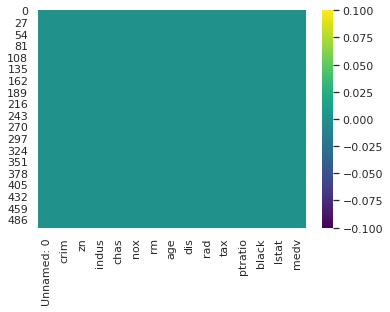

In [3]:
# check if there is any missing value
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')
# plt.show()

#Feature Engineering

In [4]:
# split dataset in features and target variable
features = dataset.iloc[:, 6:7].values
target = dataset.iloc[:, 14].values


#Predictive Modeling

In [5]:

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Create Decision Tree Regressor object
clf = DecisionTreeRegressor(max_depth=3)

# Train Decision Tree Regressor
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


#Predictive Evaluation

In [6]:

print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error (MSE):  41.26941141217946
Root Mean Squared Error (RMSE):  6.424127287980793


#Result Visualization

In [7]:

export_graphviz(clf, out_file='tree_regressor.dot',
                feature_names=["rm"], filled=True)


In [8]:

# Open Terminal:  dot -Tpng tree_regressor.dot -o tree_regressor.png => save it as png
# Samples = how many sample in the node
# Value =
!dot -Tpng tree_regressor.dot -o tree_regressor.png

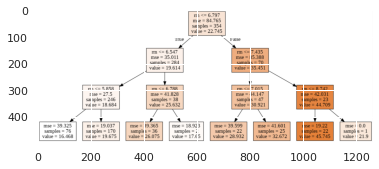

In [9]:
img = plt.imread('tree_regressor.png')
plt.imshow(img)